In [11]:
import numpy as np
import pandas as pd

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and bias
coefficients = model.coef_
bias = model.intercept_

# Calculate MSE
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

print("Coefficients:", coefficients)
print("Bias (Intercept):", bias)
print("MSE Loss:", mse)


Coefficients: [  259.54749155   322.61513282 23823.68449531]
Bias (Intercept): -11676.830425187778
MSE Loss: 37005395.750507504


In [13]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
# Load the dataset
df = pd.read_csv("insurance.csv")

# Clean and preprocess
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
X = df[['age', 'bmi', 'smoker']].values
y = df['charges'].values


In [15]:
# Initialize parameters
np.random.seed(42)
weights = np.random.randn(3)
bias = np.random.randn(1)
learning_rate = 0.01
iterations = 1000
n = len(y)

# Gradient Descent
losses = []
for _ in range(iterations):
    y_pred = np.dot(X, weights) + bias
    residuals = y_pred - y
    loss = np.mean(residuals ** 2)
    losses.append(loss)
    
    # Compute gradients
    gradient_w = (2/n) * np.dot(X.T, residuals)
    gradient_b = (2/n) * np.sum(residuals)
    
    # Update weights and bias
    weights -= learning_rate * gradient_w
    bias -= learning_rate * gradient_b

print("Final Weights:", weights)
print("Final Bias:", bias)


Final Weights: [nan nan nan]
Final Bias: [nan]


C:\Users\Student.DESK-18\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:135: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Student.DESK-18\AppData\Local\Temp\ipykernel_716\1603992988.py:14: RuntimeWarning: overflow encountered in square
  loss = np.mean(residuals ** 2)
C:\Users\Student.DESK-18\AppData\Local\Temp\ipykernel_716\1603992988.py:22: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * gradient_w


In [16]:
# Scikit-learn Prediction
sample = np.array([[40, 30, 1]])
sklearn_prediction = model.predict(sample)

# Manual Gradient Descent Prediction
manual_prediction = np.dot(sample, weights) + bias

print("Scikit-learn Prediction:", sklearn_prediction)
print("Manual Gradient Descent Prediction:", manual_prediction)


Scikit-learn Prediction: [32207.20771677]
Manual Gradient Descent Prediction: [nan]


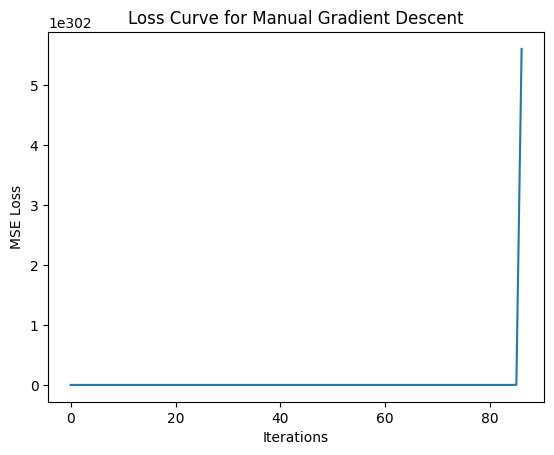

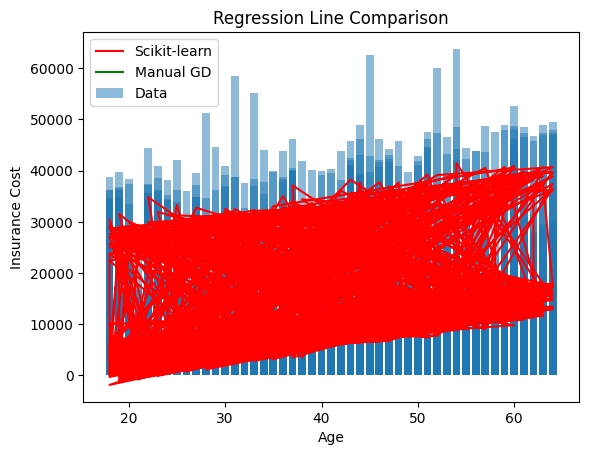

In [17]:
import matplotlib.pyplot as plt

# Loss curve
plt.plot(range(iterations), losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve for Manual Gradient Descent")
plt.show()

# Regression line for age
plt.bar(X[:, 0], y, label="Data", alpha=0.5)
plt.plot(X[:, 0], model.predict(X), color="red", label="Scikit-learn")
plt.plot(X[:, 0], np.dot(X, weights) + bias, color="green", label="Manual GD")
plt.xlabel("Age")
plt.ylabel("Insurance Cost")
plt.legend()
plt.title("Regression Line Comparison")
plt.show()
